In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data Science Project Architecture
## Getting a feel of an end-to-end data science solution

In this lab, you'll see how all the pieces of data science: data analysis, code, tooling, experiments, come together to create a complete project. You'll perform a smaller-scale demonstration of a data science project lifecycle. Of course, you have to keep in mind that "real-life" data science is highly iterative. You might be working on the same task(s) for weeks or months - this lab is not able to show that.

You'll be working with the asthma dataset located [here](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset). As always, it's preloaded for you in the `data/` directory. **Your main goal is to predict what factors lead to positive diagnosis.**

This time, I suggest you do your research into separate notebooks, not inside this one. Use one or several, as you see fit; there are no guidelines as to how many notebooks you should have, or how long (or short) they have to be.

### Problem 1. Project structure (1 point)
Create the necessary directories and structure that you'll use to put your work in. I am providing a suggestion, but you don't have to follow it.
`data/` for... data :D
`notebooks/` for your research. Feel free to move this one inside.
`src/` for Python code (which you'll need to create towards the end of the lab)
`test/` (or `tests/`) for unit tests

You may add any other structure you like. For inspiration, you can see how popular libraries handle their file structure.

Create a GitHub repo (or any other Git-based source control, but I **highly** suggest GitHub) containing your initial project structure. Don't forget to commit relatively often so you have a way to track what you've done so far and go back if something goes awry.

In [54]:
# Notes: I created the "notebooks", "src" and "tests" folders and have updated them to github: https://github.com/mitkodimitrof1422/asthma-disease-analysis.git

### Problem 2. Data Exploration (1 point)
In an appropriate notebook, load the data. Ensure its validity and start your EDA. Feel free to create any visualizations, tables, filters, etc. you see fit.

In [55]:
asthma_table = pd.read_csv("../data/asthma_disease_data.csv")

asthma_table.info()

asthma_table.isnull().sum() # To show how many empties there are:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [56]:
print(f"There are {asthma_table.duplicated().sum()} duplicate rows.") # To check how many duplicate rows there are

There are 0 duplicate rows.


### Problem 3. Data cleaning and preprocessing (1 point)
This should be self-explanatory. In an appropriate notebook (probably different than your previous one), explore different ways to clean and preprocess the dataset.

This is still part of your research. That is, don't be afraid to _try out different approaches to the same problem_. E.g., if you have a lot of missing values, you may not know right away how to handle them. Experimenting with several approaches will give you a better indication what works well for your data and goals.

In [57]:
# Converting categorical columns into "category" data type. Checked the dataset's description to be sure that each of the below columns are indeed categories - https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset

categorical_cols = ["Gender", "Ethnicity", "EducationLevel", "Smoking", "PetAllergy", "FamilyHistoryAsthma", "HistoryOfAllergies", "Eczema", "HayFever", "GastroesophagealReflux", "Wheezing", "ShortnessOfBreath", "ChestTightness", "Coughing", "NighttimeSymptoms", "ExerciseInduced", "Diagnosis"]

for col in categorical_cols:
    asthma_table[col] = asthma_table[col].astype("category")


In [58]:
asthma_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PatientID               2392 non-null   int64   
 1   Age                     2392 non-null   int64   
 2   Gender                  2392 non-null   category
 3   Ethnicity               2392 non-null   category
 4   EducationLevel          2392 non-null   category
 5   BMI                     2392 non-null   float64 
 6   Smoking                 2392 non-null   category
 7   PhysicalActivity        2392 non-null   float64 
 8   DietQuality             2392 non-null   float64 
 9   SleepQuality            2392 non-null   float64 
 10  PollutionExposure       2392 non-null   float64 
 11  PollenExposure          2392 non-null   float64 
 12  DustExposure            2392 non-null   float64 
 13  PetAllergy              2392 non-null   category
 14  FamilyHistoryAsthma     

### Problem 4. Exploratory data analysis (1 point)
This step may, or may not, happen in unison with the previous one. Your goal is to understand the data distributions, relationships, useful features, maybe create visualizations and inform your data cleaning process.

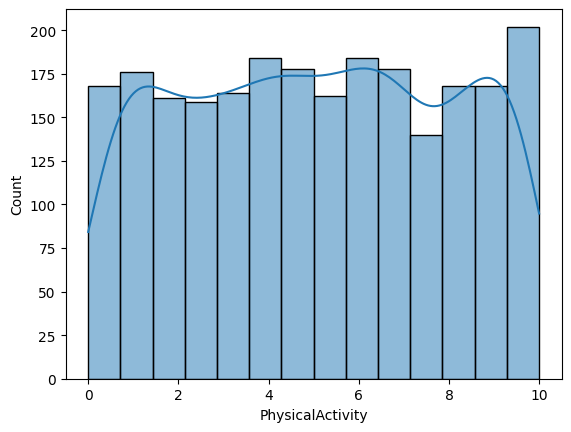

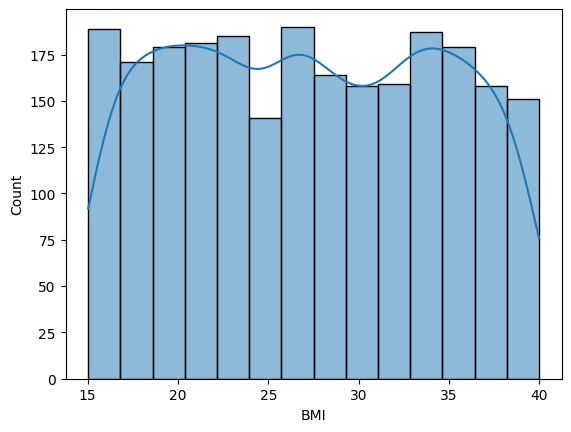

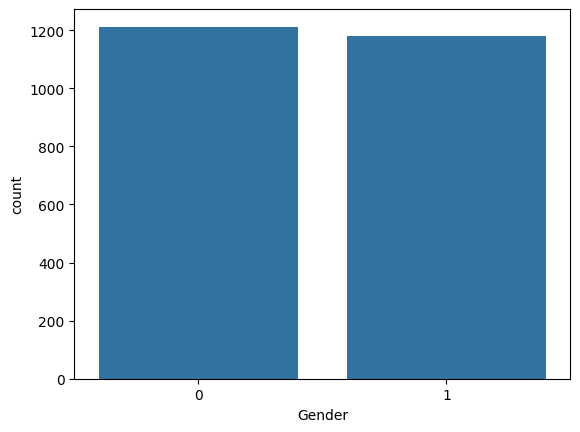

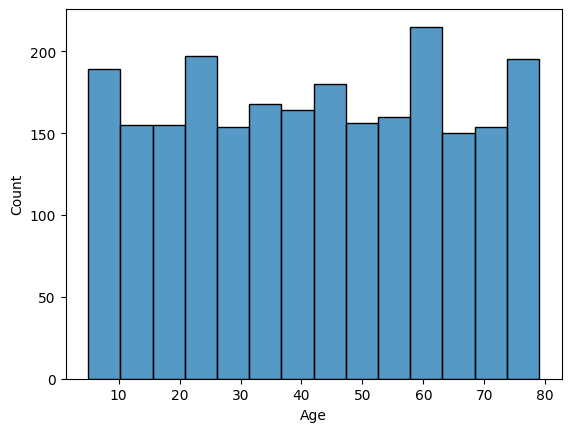

In [59]:
# Histogram for PhysicalActivity
sns.histplot(asthma_table['PhysicalActivity'], kde=True)
plt.show()

# Histogram for BMI
sns.histplot(asthma_table['BMI'], kde=True)
plt.show()

sns.countplot(x='Gender', data=asthma_table)
plt.show()

sns.histplot(data=asthma_table, x='Age')
plt.show()

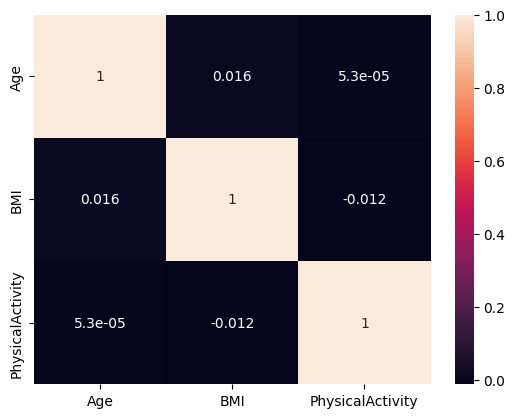

'\nAge vs BMI = 0.016: This is an extremely weak positive correlation (basically no linear relationship).\nAge vs PhysicalActivity = 0.000053: Bascially no correlation\nBMI vs PhysicalActivity = -0.012: Also very weak negative correlation, so no correlation\n'

In [60]:
corr = asthma_table[['Age','BMI','PhysicalActivity']].corr()
sns.heatmap(corr, annot=True)
plt.show()

"""
Age vs BMI = 0.016: This is an extremely weak positive correlation (basically no linear relationship).
Age vs PhysicalActivity = 0.000053: Bascially no correlation
BMI vs PhysicalActivity = -0.012: Also very weak negative correlation, so no correlation
"""


### Problem 5. Feature manipulation (1 point)
Now that your data has been thoroughly cleaned (w.r.t. your goal to model diagnoses) and explored, you'll need to "play around" and prepare good features.

You don't have to think about modelling (machine learning) at this stage (although it won't do harm). Perform feature selection and feature engineering in ways that you think will be beneficial for a "mental" model of the data. Such a model consists of hypotheses that you should be able to test.

Feel free to do any sort of feature maniplulation on the data you like. Ideally, at the end of the process, you'll have a rectangular data table consisting of only (floating-point) numbers and nothing else.

In [66]:
# Encoding the category columns. That way they become True/False, so easily readable.
asthma_table_encoded = pd.get_dummies(asthma_table, columns=categorical_cols, drop_first=True)
asthma_table_encoded

,PatientID,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,...,Eczema_1,HayFever_1,GastroesophagealReflux_1,Wheezing_1,ShortnessOfBreath_1,ChestTightness_1,Coughing_1,NighttimeSymptoms_1,ExerciseInduced_1,Diagnosis_1
0,5034,63,15.848744,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1.369051,...,False,False,False,False,False,True,False,False,True,False
1,5035,26,22.757042,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,2.197767,...,False,False,False,True,False,False,True,True,True,False
2,5036,57,18.395396,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,1.698011,...,False,True,False,True,True,True,False,True,True,False
3,5037,40,38.515278,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,3.032037,...,False,True,False,True,False,True,True,True,False,False
4,5038,61,19.283802,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,3.470589,...,False,True,False,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,29.059613,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,3.125249,...,False,False,False,False,True,False,False,False,True,True
2388,7422,18,20.740850,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,1.132977,...,True,False,False,False,False,False,True,True,False,True
2389,7423,54,37.079560,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,1.685962,...,False,True,False,True,False,True,True,False,True,True
2390,7424,46,23.444712,9.672637,7.362861,6.717272,9.448862,7.712584,5.051405,3.481549,...,False,False,True,False,True,True,False,True,True,False


In [71]:
asthma_table_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2392 non-null   int64  
 1   Age                       2392 non-null   float64
 2   BMI                       2392 non-null   float64
 3   PhysicalActivity          2392 non-null   float64
 4   DietQuality               2392 non-null   float64
 5   SleepQuality              2392 non-null   float64
 6   PollutionExposure         2392 non-null   float64
 7   PollenExposure            2392 non-null   float64
 8   DustExposure              2392 non-null   float64
 9   LungFunctionFEV1          2392 non-null   float64
 10  LungFunctionFVC           2392 non-null   float64
 11  DoctorInCharge            2392 non-null   object 
 12  Gender_1                  2392 non-null   bool   
 13  Ethnicity_1               2392 non-null   bool   
 14  Ethnicit

### Problem 6. Data preparation and manipulation script (2 points)
So far, you should have tried lots of different ways to work with the data. Some of them should have been good, others - not so much. This is extremely valuable research, and we don't want to lose it, but now we have to think about automation.

Extract your data preprocessing and manipulation functions into one or more files in the `src/` (or similar) directory. Debug the code and ensure it's been optimized. Use vectorization and the `pandas` / `numpy` APIs as much as possible. I don't usually expect data processing scripts to create visualizations. Most often, they consist of functions which accept some dataframe(s) and return (an)other dataframe(s). Also, we usually avoid one-liners (e.g., a function which only calls a different function) unless there's a very good reason for them (e.g., it's semantically easier to understand).

Refactor the code so that it's **reusable**. Function parameters (and polymorphism) achieve a lot in terms of reusability :). Avoid hardcoding stuff. Follow the best practices in Python and the style guides. Use a linter to help you clean up your code.

In [83]:
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    """Remove duplicate rows from the DataFrame."""
    return df.drop_duplicates()

def fill_missing_values(df: pd.DataFrame, categorical_cols: list, numeric_cols: list) -> pd.DataFrame:
    """Fill missing values for categorical and numeric columns."""
    for col in categorical_cols:
        if col in df.columns:
            # Assign the filled column back instead of using inplace
            df[col] = df[col].fillna(df[col].mode()[0])
    for col in numeric_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    return df

def convert_categorical(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """Convert specified columns to categorical dtype."""
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')
    return df

def encode_categorical(df: pd.DataFrame, categorical_cols: list, drop_first: bool = True) -> pd.DataFrame:
    """One-hot encode categorical columns."""
    existing_cols = [col for col in categorical_cols if col in df.columns]
    return pd.get_dummies(df, columns=existing_cols, drop_first=drop_first)

def scale_numeric(df: pd.DataFrame, numeric_cols: list) -> pd.DataFrame:
    """Standardize numeric columns."""
    existing_cols = [col for col in numeric_cols if col in df.columns]
    scaler = StandardScaler()
    df[existing_cols] = scaler.fit_transform(df[existing_cols])
    return df

def prepare_asthma_data(df: pd.DataFrame, categorical_cols: list, numeric_cols: list, scale: bool = True) -> pd.DataFrame:
    """Full preprocessing pipeline for asthma dataset."""
    df = remove_duplicates(df)
    df = fill_missing_values(df, categorical_cols, numeric_cols)
    df = convert_categorical(df, categorical_cols)
    df = encode_categorical(df, categorical_cols)
    if scale:
        df = scale_numeric(df, numeric_cols)
    return df


In [84]:
# Listing the numeric columns so we can clean them:

numeric_cols = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'LungFunctionFEV1' , 'LungFunctionFVC']

In [85]:
# Applying the functions:

asthma_table_clean = prepare_asthma_data(asthma_table, categorical_cols, numeric_cols)

In [86]:
asthma_table_clean

,PatientID,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,...,Eczema_1,HayFever_1,GastroesophagealReflux_1,Wheezing_1,ShortnessOfBreath_1,ChestTightness_1,Coughing_1,NighttimeSymptoms_1,ExerciseInduced_1,Diagnosis_1
0,5034,0.965740,-1.582769,-1.432099,0.160113,0.971063,0.809355,-0.780866,-1.401921,-1.368934,...,False,False,False,False,False,True,False,False,True,False
1,5035,-0.747054,-0.623300,0.291269,0.453069,-1.076746,-1.036866,0.810184,0.560684,-0.407132,...,False,False,False,True,False,False,True,True,True,False
2,5036,0.687989,-1.229074,0.581330,1.434458,-0.102976,-1.210374,-1.267434,0.162295,-0.987146,...,False,True,False,True,True,True,False,True,True,False
3,5037,-0.098970,1.565307,-1.256398,0.276233,-1.596880,-1.509757,0.849659,-0.355611,0.561114,...,False,True,False,True,False,True,True,True,False,False
4,5038,0.873156,-1.105686,-0.154081,-0.651625,1.504976,-1.373822,-0.713717,1.146977,1.070095,...,False,True,False,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,0.039905,0.252042,-0.699950,0.376978,0.740107,-0.861740,0.760717,-0.544470,0.669296,...,False,False,False,False,True,False,False,False,True,True
2388,7422,-1.117388,-0.903322,0.259526,-0.218561,0.411163,0.927074,-0.980178,0.519779,-1.642920,...,True,False,False,False,False,False,True,True,False,True
2389,7423,0.549114,1.365905,-0.109067,1.096868,0.268175,-0.755772,-0.711873,1.574952,-1.001130,...,False,True,False,True,False,True,True,False,True,True
2390,7424,0.178780,-0.527792,1.591768,0.804295,-0.174204,1.511361,0.898316,0.024327,1.082816,...,False,False,True,False,True,True,False,True,True,False


### Problem 7. Documentation (1 point)
Ensure all your public-facing functions (that is, functions that are "exposed" to the user) have docstrings. Ensure they are well-documented and their purpose is clear. This is especially valuable if you're doing some advanced analysis or data manipulation. You can see various ways of creating docstrings online. There are even tools (e.g., VSCode extensions) which will help you with the docstring boilerplate.

### Problem 8. Testing (1 point)
Now that you've done the previous two problems, you have _specification_ (your documentation - it tells you what you intend to do) and _implementation_ (your well-written and refactored code - it tells you _how_ it's done). The difficult part now is to ensure these two things match.

Create unit tests for your functions. Be careful so you test _your_ code, not `pandas`'. Create hypothesis tests to validate your assumptions. Do validity checks on the input data and sanity checks on the outputs of functions. Ensure your code is well-tested. Ensure it's modular, reusable, and flexible; but most of all - that it works **correctly**. If you haven't yet (though you should have - in problem 6) - think about exceptions and exception handling.

### Problem 9. Reproducibility (1 point)
Ensure all your notebooks and scripts are not only correct, but also reproducible. List all code dependencies (probably in a `requirements.txt` file); ensure your random seeds are correct; ensure the code produces the same results when run multiple times, etc.

Do your final cleanup work. You might want to differentiate your "draft" noteoboks from your "official" ones (although I advise against that) and creat your final commits.

### * Problem 10. Above and beyond
Of course, there are many things to be done. If you have time, I advise you learn how to work with data versioning (using DVC) and data pipeline / artifact tracking (using MLFlow or a similar tool). You might also find it useful to create a "proper", advanced data pipeline where you may need to work with big files (using Dask or a similar library), or schedule and organize tasks (using data pipeline managers like Luigi or Airflow).

You might also want to do machine learning. I've deliberately stayed away from that for the purposes of the lab because it's a whole different beast, but it's a worthy challenge and it's extremely interesting.